In [ ]:
PATH='/content/drive/MyDrive/Colab Notebooks/Bài TH3/housing.csv' # đặt tên biến cho đường dẫn là PATH

In [ ]:
import pandas as pd   

In [ ]:
data = pd.read_csv(PATH) # Đọc 

In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#Câu 1


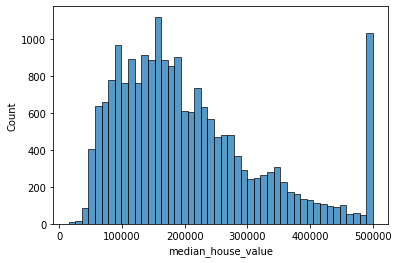

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data['median_house_value'])


#Câu 2

In [ ]:
data.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Trực quan hóa dữ liệu bằng cách rời rạc hóa để thống kê bằng tứ phân vị



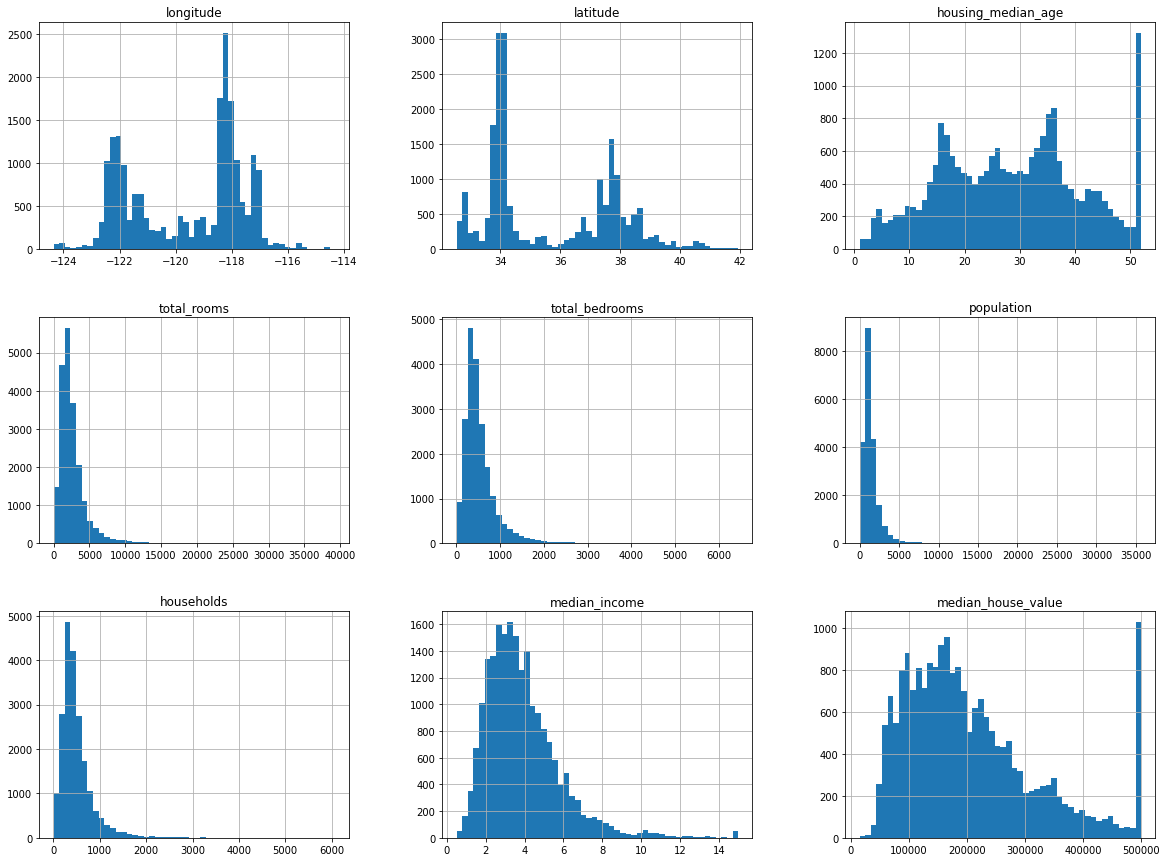

In [ ]:
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15) )
plt.show()

trực quan theo khuynh hướng 

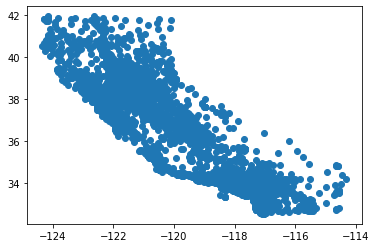

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=data['longitude'], y=data['latitude'])
plt.show()

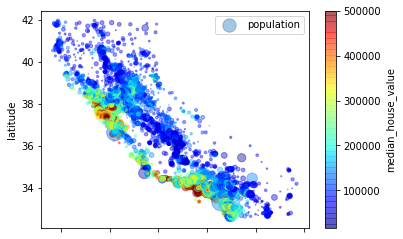

In [ ]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,

         s=data["population"]/100, label="population",

         c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,

     )

plt.legend()

#Câu 3:

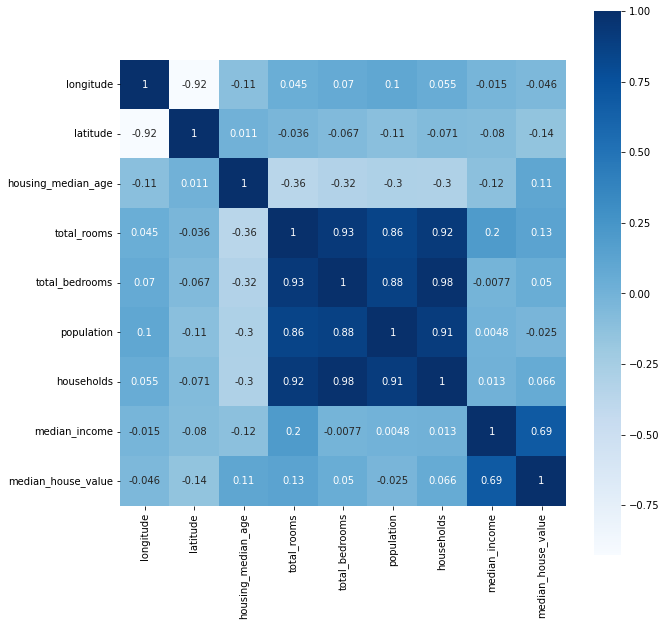

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# tinh su phu thuoc cua tung thuoc tinh
correlation = data.corr(method='pearson')
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')


In [ ]:
x=data['median_income']
y=data['median_house_value']

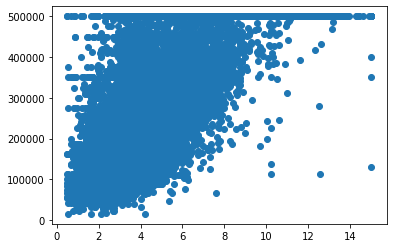

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=x,y=y)
plt.show()

chuẩn hóa y về miền giá trị [1,50]

In [ ]:
  from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler( feature_range =(1,55) )
y_transformed = scaler.fit_transform(y.values.reshape(-1,1))

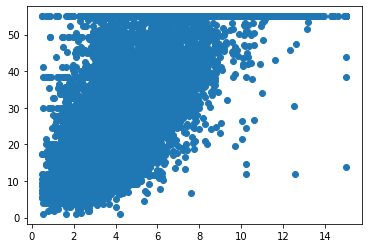

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=x,y=y_transformed)
plt.show()

#Câu 6

chia

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y_transformed, test_size=0.2, random_state=42)
train_test_split(y, shuffle=False)

[0        452600.0
 1        358500.0
 2        352100.0
 3        341300.0
 4        342200.0
            ...   
 15475    132800.0
 15476    214300.0
 15477    159900.0
 15478    158500.0
 15479    202700.0
 Name: median_house_value, Length: 15480, dtype: float64, 15480    193200.0
 15481    168400.0
 15482    174600.0
 15483    158900.0
 15484    172600.0
            ...   
 20635     78100.0
 20636     77100.0
 20637     92300.0
 20638     84700.0
 20639     89400.0
 Name: median_house_value, Length: 5160, dtype: float64]

In [ ]:
X_train = X_train.values.reshape(-1,1)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_test= X_test.values.reshape(-1,1)

In [ ]:
y_pred= model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared =True)


87.90581581394004

#Câu 8

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
kf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
avg_mse = []
for train_index, test_index in kf.split(x, y_transformed):
 X_train = x.values[train_index].reshape(-1,1)
 y_train = y_transformed[train_index]
 X_test = x.values[test_index].reshape(-1,1)
 y_test = y_transformed[test_index]
 model = LinearRegression()
 model.fit(X_train, y_train)
 y_pred = model.predict(X_test)
 result = mean_squared_error(y_test, y_pred, squared=True)

 # Lưu lại kết quả từng fold vào avg_mse
 avg_mse.append(result)

In [ ]:
import numpy as np
np.mean(np.array(avg_mse))


87.48644533666005

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared =True)


85.792519146726

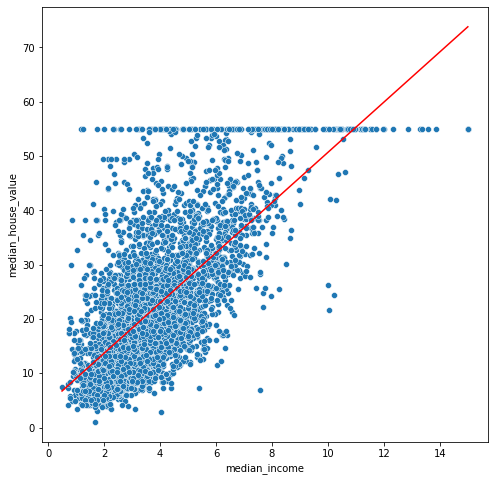

In [ ]:
import seaborn as sns
test_true = pd.DataFrame({'median_income': X_test.reshape(-1), 'median_house_value': y_test.reshape(-1)})
test_pred = pd.DataFrame({'median_income': X_test.reshape(-1), 'median_house_value': y_pred.reshape(-1)})
fig= plt.figure(figsize=(8,8))
sns.lineplot(data=test_pred, x="median_income", y="median_house_value", color='red')
sns.scatterplot(data=test_true, x="median_income", y="median_house_value")